# LightGBM Classifier in Python

Hello friends,

In this kernel, I will discuss one of the most successful ML algorithm LightGBM Classifier. LightGBM is a fast, distributed, high performance gradient boosting framework based on decision tree algorithms, used for ranking, classification and many other machine learning tasks. It has helped Kagglers win data science competitions.

So, let's get started.

## Table of Contents ¶
1. [Introduction to LightGBM](#introduction)
2. [LightGBM intuition](#intuition)
3. [XGBoost Vs LightGBM](#xgboost-vs-lightgbm)
4. [LightGBM Parameters](#parameters)
   - [4.1 Control Parameters](#control-parameters)
   - [4.2 Core Parameters](#core-parameters)
   - [4.3 Metric Parameter](#metric-parameter)
   - [4.4 IO Parameter](#io-parameter)
5. [LightGBM implementation in Python](#implementation)
6. [LightGBM Parameter Tuning](#tuning)


# 1. Introduction to LightGBM
[🔙 Table of Contents](#table-of-contents)

LightGBM is a gradient boosting framework that uses tree-based learning algorithms. It is designed to be distributed and efficient with the following advantages:

- Faster training speed and higher efficiency  
- Lower memory usage  
- Better accuracy  
- Support of parallel and GPU learning  
- Capable of handling large-scale data  

At present, decision tree-based machine learning algorithms dominate Kaggle competitions. The winning solutions in these competitions have adopted an algorithm called **XGBoost**.  

A couple of years ago, Microsoft announced its gradient boosting framework **LightGBM**. Nowadays, it steals the spotlight in gradient boosting machines. Kagglers are using LightGBM more than XGBoost because **LightGBM is ~6 times faster**.  

LightGBM is relatively new and has a long list of parameters given in the official [LightGBM Documentation](https://github.com/microsoft/LightGBM).  

The size of datasets is increasing rapidly, making it very difficult for traditional data science algorithms to give accurate results. LightGBM (short for "Light Gradient Boosting Machine") is designed for **high speed and low memory usage**.  

Another reason why LightGBM is so popular is because it focuses on **accuracy of results**. It also supports **GPU learning**, which is why data scientists widely use it for ML application development.  

⚠️ **Note:** It is not advisable to use LightGBM on small datasets, since it is sensitive to overfitting.  

👉 Explore:  
- [LightGBM GitHub Repository](https://github.com/Microsoft/LightGBM)  
- [LightGBM Documentation](https://github.com/microsoft/LightGBM)  


# 2. LightGBM Intuition
[🔙 Table of Contents](#table-of-contents)

LightGBM is a gradient boosting framework that uses tree-based learning algorithms.  

According to the [LightGBM documentation](https://github.com/microsoft/LightGBM):  

> **LightGBM grows trees vertically, while other tree-based learning algorithms grow trees horizontally.**  
> - LightGBM grows trees **leaf-wise**, while most algorithms grow them **level-wise**.  
> - It selects the **leaf with the maximum delta loss** to grow.  
> - When growing the same leaf, the **leaf-wise algorithm reduces more loss** compared to the level-wise algorithm.  


### 🌳 Tree Growth Styles:
- **Level-wise growth**:  
  - Splits nodes level by level (all leaves at the same depth).  
  - More balanced but less efficient.  
  - Used by algorithms like XGBoost.  

- **Leaf-wise growth (LightGBM)**:  
  - Splits the leaf that gives the **largest loss reduction**.  
  - Can achieve **better accuracy**.  
  - But, it may cause **overfitting** on small datasets.  

📌 Thus, the key difference is:  
**LightGBM focuses on reducing loss faster by growing leaf-wise, whereas other algorithms prefer balanced trees by growing level-wise.**


## 2.1 Leaf-wise Tree Growth  
[🔙 Table of Contents](#table-of-contents)

Leaf-wise tree growth can best be explained with this visual comparison:

![Leaf-wise vs Level-wise Tree Growth](attachment)  <!-- Will display the image above -->

---

### What this diagram shows:
- **Level-wise (horizontal) growth**: Splits all nodes at the same tree depth before moving deeper. Produces balanced, shallow trees.
- **Leaf-wise (vertical) growth**, used by LightGBM: Splits only the leaf that yields the **largest reduction in loss**, producing deeper, narrower trees.

This strategy allows LightGBM to often achieve **higher accuracy with fewer nodes**, but can risk **overfitting on small datasets**.:contentReference[oaicite:2]{index=2}

---

### Why it matters:
- **Faster convergence**: By focusing on the most impactful splits, models learn more effectively.:contentReference[oaicite:3]{index=3}  
- **Control over complexity**: Parameters like `max_depth` or `num_leaves` help prevent overly deep or complex trees.:contentReference[oaicite:4]{index=4}

---

**Summary Table**

| Growth Strategy | Description | Pros | Cons |
|-----------------|-------------|------|------|
| **Level-wise**  | Grow each level fully before next | Balanced trees; less risk of overfitting | Slower loss reduction |
| **Leaf-wise**   | Grow the leaf with maximum loss reduction | Faster learning; better accuracy | Risk of overfitting if unchecked |



## 2.2 Level-wise Tree Growth
[🔙 Table of Contents](#table-of-contents)

Most decision tree learning algorithms grow trees **level-wise (depth-wise)**.

---

### 🌳 Level-wise Tree Growth
Level-wise tree growth can best be explained with this visual:

![Level-wise Tree Growth](https://lightgbm.readthedocs.io/en/latest/_images/level_wise.png)

---

### 🔑 Key Points:
- **Level-wise growth** expands **all nodes at the same depth** before moving deeper.  
- Produces **balanced trees**, where all leaves are at similar depths.  
- Used by many algorithms, including **XGBoost** and traditional decision trees.  
- More stable and less prone to **overfitting on small datasets** compared to leaf-wise growth.  

---

### ✅ Summary:
- **Balanced splits** → Trees are uniform in depth.  
- **Slower loss reduction** compared to leaf-wise growth.  
- **Safer choice** for small or noisy datasets.  


## Important Points about Tree Growth
[🔙 Table of Contents](#table-of-contents)

- If we grow the **full tree**, both **best-first (leaf-wise)** and **depth-first (level-wise)** will result in the **same tree**.  
  - The only difference is the **order in which the tree is expanded**.  

- Since we rarely grow trees to their full depth, the **order matters a lot**.  

- **Early stopping criteria** and **pruning methods** can lead to **very different trees**:  
  - **Leaf-wise** chooses splits based on their contribution to the **global loss**, not just local branch loss.  
  - This often (but not always) results in **lower-error trees faster** than level-wise.  

- For a **small number of nodes**, **leaf-wise generally outperforms level-wise**.  

- As more nodes are added, and without pruning/stopping:  
  - Both strategies will eventually **converge to the same performance**,  
  - Because they will ultimately build the **same tree structure**.  

---

### ⚖️ Summary:
- **Leaf-wise** → Faster loss reduction, better for larger datasets, but risk of overfitting.  
- **Level-wise** → More balanced growth, safer for smaller datasets.  
- Both become **equivalent at full depth**, but practical constraints (stopping/pruning) make them behave differently in real-world training.


# 3. XGBoost Vs LightGBM
[🔙 Table of Contents](#table-of-contents)

**XGBoost** is a very fast and accurate ML algorithm, but it has been challenged by **LightGBM**, which runs even faster with comparable model accuracy and more hyperparameters to tune.  

---

### ⚡ Key Differences:

1. **Tree Growth Strategy**
   - **XGBoost**: Splits tree nodes **level-by-level (depth-wise)** by default.  
   - **LightGBM**: Splits tree nodes **leaf-by-leaf (best-first)**.  

   🔑 This is the **main reason for LightGBM’s higher speed**.  

---

2. **Speed Comparison**
   - **LightGBM**: ~**1.3X to 1.5X faster** than XGBoost (even after XGBoost improvements).  
   - **XGBoost**: Later introduced `grow_policy = 'lossguide'` to allow **split-by-leaf**, catching up closer to LightGBM’s performance.  

---

3. **Model Interpretability**
   - **XGBoost**: Supports **monotonic constraints**, which enforce feature-target monotonic relationships.  
     - Improves **interpretability**.  
     - May **reduce accuracy** and **increase training time**.  
   - **LightGBM**: Lacks monotonic constraints.  

---

### ✅ Summary:
- **LightGBM**: Faster, more efficient, especially for large datasets.  
- **XGBoost**: Slightly slower but offers **more interpretability features** (like monotonic constraints).  

👉 Both are widely used and often **perform comparably** — choice depends on **dataset size, interpretability needs, and speed requirements**.  


# 4. LightGBM Parameters
[🔙 Table of Contents](#table-of-contents)

LightGBM provides **more than 100 parameters** that can be tuned for different tasks.  
📖 Official docs: [LightGBM Parameters](https://github.com/microsoft/LightGBM/blob/master/docs/Parameters.rst)

It is very important to know some **basic parameters** before diving into advanced tuning.  

In this section, we will discuss the main categories of LightGBM parameters:

- **Control Parameters** (to control boosting type, objective, number of iterations, etc.)  
- **Core Parameters** (that define the tree structure and complexity)  
- **Metric Parameters** (to evaluate model performance)  
- **IO Parameters** (for input/output efficiency)  


## 4.1 Control Parameters
[🔙 Table of Contents](#table-of-contents)

These parameters control the **overall behavior** of LightGBM, including tree depth, sampling, and early stopping.  

---

### 🔑 Key Control Parameters

- **`max_depth`**  
  - Maximum depth of the tree.  
  - Helps to control **overfitting**.  
  - If the model is overfitting, **lower this value**.  

---

- **`min_data_in_leaf`**  
  - Minimum number of records a leaf may have.  
  - Default = **20** (a good starting point).  
  - Used to **reduce overfitting** by preventing overly small leaves.  

---

- **`feature_fraction`**  
  - Used when boosting = **random forest**.  
  - Example: `0.8` → LightGBM will randomly select **80% of features** in each iteration.  
  - Helps with **regularization** and improves generalization.  

---

- **`bagging_fraction`**  
  - Fraction of training data used in each iteration.  
  - Useful for **speeding up training** and reducing **overfitting**.  

---

- **`early_stopping_round`**  
  - Stops training early if the validation metric does not improve within the given rounds.  
  - Prevents **unnecessary iterations** and speeds up analysis.  

---

- **`lambda`**  
  - Regularization parameter (L2 penalty).  
  - Typical range: **0 to 1**.  
  - Helps reduce **overfitting** by penalizing complex models.  

---

- **`min_gain_to_split`**  
  - Minimum gain required to make a split.  
  - Controls the number of **useful splits** in a tree.  

---

- **`max_cat_group`**  
  - When the number of categories is large, LightGBM merges them into groups (`max_cat_group`).  
  - Prevents **overfitting on categorical features**.  
  - Default = **64**.  

---

✅ These parameters are critical for controlling **model complexity, speed, and overfitting** in LightGBM.  


## 4.2 Core Parameters
[🔙 Table of Contents](#table-of-contents)

These parameters define the **main behavior of LightGBM models**, including the task type, boosting strategy, and core hyperparameters.  

---

### ⚡ Task & Application
- **`task`**  
  - Specifies the task to perform.  
  - Options:  
    - `train` → Train the model  
    - `predict` → Make predictions  

- **`application`** (or `objective`)  
  - Defines the **type of problem**.  
  - Default = **regression**.  
  - Options:  
    - `regression` → Regression problems  
    - `binary` → Binary classification  
    - `multiclass` → Multi-class classification  

---

### ⚡ Boosting Type
- **`boosting`** (default = `gbdt`)  
  - Defines which boosting algorithm to use:  
    - `gbdt` → Gradient Boosting Decision Tree (traditional)  
    - `rf` → Random Forest  
    - `dart` → Dropouts meet Multiple Additive Regression Trees  
    - `goss` → Gradient-based One-Side Sampling  

---

### ⚡ Iterations & Learning
- **`num_boost_round`**  
  - Number of boosting iterations.  
  - Typical values: **100+**.  

- **`learning_rate`**  
  - Controls the **impact of each tree** on the final prediction.  
  - Lower values → more accurate but need more iterations.  
  - Typical values: **0.1, 0.01, 0.003**.  

---

### ⚡ Tree Complexity
- **`num_leaves`**  
  - Maximum number of leaves in one tree.  
  - Default = **31**.  
  - Larger values → more complex trees, risk of overfitting.  

---

### ⚡ Device
- **`device`**  
  - Specifies the hardware to use.  
  - Options:  
    - `cpu` (default)  
    - `gpu` (for faster training on large datasets)  

---

✅ These **core parameters** are the foundation of LightGBM. Correctly tuning them determines **training speed, model complexity, and accuracy**.  


# 4.3 Metric Parameter ¶
[Back to Table of Contents](#table-of-contents)

LightGBM uses the **`metric`** parameter to specify the loss function for model evaluation.  
It is one of the most important parameters as it defines how the model’s performance is measured.  

### Common Metrics:
- **`mae`** : Mean Absolute Error (used for regression)  
- **`mse`** : Mean Squared Error (used for regression)  
- **`binary_logloss`** : Log loss for binary classification  
- **`multi_logloss`** : Log loss for multi-class classification  


<a id="io-parameter"></a>
## 4.4 IO Parameter ¶
[Back to Table of Contents](#table-of-contents)

- **max_bin** : It denotes the maximum number of bins that feature values will be bucketed into.  
- **categorical_feature** : It denotes the index of categorical features.  
  Example: if `categorical_features=0,1,2`, then column 0, column 1, and column 2 are categorical variables.  
- **ignore_column** : Similar to `categorical_feature`, but instead of considering specific columns as categorical, it completely ignores them.  
- **save_binary** : If memory size is a concern, specify this parameter as `True`. This saves the dataset as a binary file, which speeds up data reading for the next time.  


<a id="5"></a>
# 5. LightGBM implementation in Python ¶  
[Back to Table of Contents](#toc)

# Initial Set-Up

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization

In [2]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Read dataset

In [3]:
# load and preview data
df = pd.read_csv(r'/content/Breast_cancer_data.csv')
df.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


# View summary of dataset

In [4]:
# view summary of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   mean_radius      569 non-null    float64
 1   mean_texture     569 non-null    float64
 2   mean_perimeter   569 non-null    float64
 3   mean_area        569 non-null    float64
 4   mean_smoothness  569 non-null    float64
 5   diagnosis        569 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 26.8 KB


We can see that there are 6 columns in the dataset and there are no missing values.

Check the distribution of target variable¶
- target variable is diagnosis
- check the distribution of the target variable.

In [6]:
# check the distribution of the target variable
df['diagnosis'].value_counts()

,count
diagnosis,
1,357
0,212


- The target variable is diagnosis. It contains 2 values - 0 and 1.

- 0 is for Negative prediction and 1 for Positive prediction.

- We can see that the problem is binary classification task.

# Declare feature vector and target variable

In [7]:
X = df[['mean_radius','mean_texture','mean_perimeter','mean_area','mean_smoothness']]
y = df['diagnosis']

# Split dataset into training and test set

In [8]:
# split the dataset into the training set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# LightGBM Model Development and Training¶

- We need to convert our training data into LightGBM dataset format(this is mandatory for LightGBM training).

- After creating the necessary dataset, we created a python dictionary with parameters and their values.

- Accuracy of the model depends on the values we provide to the parameters.

- In the end block of code, we simply trained model with 100 iterations.

In [ ]:
import lightgbm as lgb

clf = lgb.LGBMClassifier()
clf.fit(X_train, y_train)

# Print all parameters in detail
print(clf.get_params())


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

# Model Prediction

In [13]:
# predict the results
y_pred=clf.predict(X_test)

# View Accuracy

In [14]:
# view accuracy
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_pred, y_test)
print('LightGBM Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))

LightGBM Model accuracy score: 0.9298


- Here, y_test are the true class labels and y_pred are the predicted class labels in the test-set.

# Compare train and test set accuracy¶
- Now, I will compare the train-set and test-set accuracy to check for overfitting.

In [15]:
y_pred_train = clf.predict(X_train)

In [16]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 1.0000


# Check for Overfitting

In [17]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf.score(X_test, y_test)))

Training set score: 1.0000
Test set score: 0.9298


- The training and test set accuracy are quite comparable. So, we cannot say there is overfitting.

# Confusion-matrix

In [18]:
# view confusion-matrix
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[ 55   8]
 [  4 104]]

True Positives(TP) =  55

True Negatives(TN) =  104

False Positives(FP) =  8

False Negatives(FN) =  4


<Axes: >

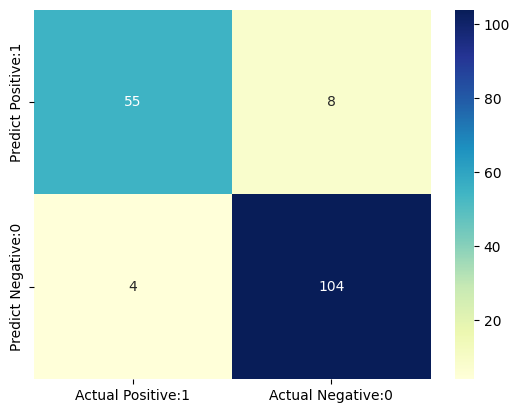

In [19]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

# Classification Metrices

In [20]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.87      0.90        63
           1       0.93      0.96      0.95       108

    accuracy                           0.93       171
   macro avg       0.93      0.92      0.92       171
weighted avg       0.93      0.93      0.93       171



<a id="6"></a>
# 6. LightGBM Parameter Tuning ¶
[Back to Table of Contents](#toc)

In this section, I will discuss some tips to improve LightGBM model efficiency.  
The following set of practices can be used to improve your model performance and prevent overfitting/underfitting:

---

### 1. `num_leaves`
- This is the main parameter to control the complexity of the tree model.  
- Ideally, the value of `num_leaves` should be less than or equal to `2^(max_depth)`.  
- A value greater than this may lead to **overfitting**.

---

### 2. `min_data_in_leaf`
- Minimum number of samples a leaf must contain.  
- Setting it to a **large value** avoids overly deep trees and prevents overfitting.  
- However, if it's too large, the model may **underfit**.  
- In practice, setting it to **hundreds or thousands** works well for large datasets.

---

### 3. `max_depth`
- This explicitly limits the depth of the tree.  
- Helps in controlling **model complexity** and **training time**.  
- Prevents overfitting by restricting the tree from becoming too deep.  

---

✅ These parameters are the **starting point** for LightGBM tuning.  
Later, you can also tune learning rate, boosting rounds, feature_fraction, and bagging_fraction.  


### For Faster Speed ¶

- Use **bagging** by setting `bagging_fraction` and `bagging_freq`.  
- Use **feature sub-sampling** by setting `feature_fraction`.  
- Use **small `max_bin`**.  
- Use **save_binary** to speed up data loading in future learning.  


### For Better Accuracy ¶
- Use **large `max_bin`** (may be slower).  
- Use **small `learning_rate`** with **large `num_iterations`**.  
- Use **large `num_leaves`** (may cause over-fitting).  
- Use **bigger training data**.  
- Try **DART** (Dropouts meet Multiple Additive Regression Trees).  
- Try to use **categorical features directly**.  


### To Deal with Overfitting

LightGBM provides several parameters that can help in reducing overfitting:

1. **Use small `max_bin`**  
   - Reduces the number of splits, leading to simpler trees.

2. **Use small `num_leaves`**  
   - Fewer leaves prevent overly complex trees.

3. **Use `min_data_in_leaf` and `min_sum_hessian_in_leaf`**  
   - Ensures that each leaf has enough data, avoiding overly specific splits.

4. **Use bagging by setting `bagging_fraction` and `bagging_freq`**  
   - Randomly samples data to train, reducing variance.

5. **Use feature sub-sampling by setting `feature_fraction`**  
   - Randomly samples features, preventing over-reliance on specific features.

6. **Use bigger training data**  
   - More data reduces variance and overfitting.

7. **Try `lambda_l1`, `lambda_l2`, and `min_gain_to_split` for regularization**  
   - L1/L2 regularization reduces model complexity.  
   - `min_gain_to_split` prevents unnecessary splits.

8. **Try `max_depth` to avoid growing deep_**


## 7. References ¶
**Table of Contents**

The ideas and concepts in this notebook are taken from the following resources:  

- [LightGBM GitHub Repository](https://github.com/Microsoft/LightGBM)  
- [LightGBM Parameters Documentation](https://github.com/microsoft/LightGBM/blob/master/docs/Parameters.rst)  
- [Medium: What is LightGBM, How to Implement it, How to Fine-Tune Parameters](https://medium.com/@pushkarmandot/https-medium-com-pushkarmandot-what-is-lightgbm-how-to-implement-it-how-to-fine-tune-the-parameters-60347819b7fc)  
- [Sefiks Blog: A Gentle Introduction to LightGBM for Applied Machine Learning](https://sefiks.com/2018/10/13/a-gentle-introduction-to-lightgbm-for-applied-machine-learning/)  
- [Towards Data Science: Build XGBoost & LightGBM Models on Large Datasets](https://towardsdatascience.com/build-xgboost-lightgbm-models-on-large-datasets-what-are-the-possible-solutions-bf882da2c27d)  


---

## 🎯 Conclusion  

That is the end of this kernel.  

I hope you find this kernel useful and enjoyable.  

Your comments and feedback are most welcome.  

Thank you 🙏  

---

[🔝 Go to Top](#table-of-contents)
